# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rizqy Mubarok
- **Email:** rizqymubarok99@gmail.com
- **ID Dicoding:** rizqy mubarok

## Menentukan Pertanyaan Bisnis

1. Analisis Distribusi Pelanggan:

    Pertanyaan Bisnis:
        Di mana lokasi konsentrasi pelanggan terbesar? Apakah ada wilayah tertentu yang memiliki lebih banyak pelanggan dibandingkan wilayah lainnya?
        Apakah distribusi pelanggan lebih banyak berada di kota-kota besar atau di daerah dengan kode pos tertentu?
      

2. Analisis Pembayaran:

    Pertanyaan Bisnis:
        Jenis pembayaran apa yang paling sering digunakan oleh pelanggan? Apakah ada preferensi pembayaran tertentu berdasarkan wilayah atau kota?
        Bagaimana distribusi pembayaran berdasarkan jenisnya? Apakah ada metode pembayaran yang lebih populer di kalangan pelanggan tertentu?
        Apakah ada hubungan antara jenis pembayaran dengan jumlah transaksi atau nilai pembayaran?

3. Analisis RFM (Recency, Frequency, Monetary):

    Pertanyaan Bisnis:
        Bagaimana membagi pelanggan berdasarkan nilai RFM mereka? Siapa saja pelanggan dengan nilai RFM tinggi (high value) dan rendah (low value)?
        Apa karakteristik pelanggan yang berpotensi memberikan pendapatan tinggi (high value) dalam jangka panjang?
        Dapatkah pelanggan dengan nilai rendah diberi insentif atau strategi pemasaran untuk meningkatkan frekuensi dan nilai pembelian mereka?

4. Analisis Geospatial:

    Pertanyaan Bisnis:
        Apakah ada pola geografis tertentu dalam distribusi pelanggan atau titik pengiriman?
        Seberapa jauh jarak antar titik pengiriman dan bagaimana pengaruhnya terhadap biaya atau waktu pengiriman?
        Apakah kluster geografis tertentu memiliki potensi untuk menawarkan layanan atau produk yang lebih khusus berdasarkan karakteristik lokal?

5. Segmentasi Pelanggan dengan K-Means:

    Pertanyaan Bisnis:
        Apakah segmentasi berdasarkan geolokasi memberikan wawasan tambahan untuk strategi pemasaran atau logistik?
        Bagaimana cara menggunakan kluster ini untuk merancang kampanye pemasaran yang lebih efektif atau meningkatkan pengalaman pelanggan?
        Apakah ada kluster yang dapat dijadikan target untuk pengembangan produk baru atau penawaran khusus?

6. Pemetaan dan Buffer Area:

    Pertanyaan Bisnis:
        Bagaimana menggunakan informasi jarak dan buffer area untuk merencanakan distribusi atau pemasaran berbasis lokasi?
        Apakah ada peluang untuk membuka cabang baru atau menambah titik distribusi di area dengan konsentrasi pelanggan tinggi?
        Bagaimana pemetaan geografis bisa membantu dalam perencanaan strategi pengiriman atau peningkatan layanan di lokasi tertentu?



## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sns
import geopandas as gpd
import folium
from geopy.distance import geodesic
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [ ]:
#1.Customer_df
customer_df = pd.read_csv("customers_dataset.csv")
customer_df.head()

#2.Geolocation_df
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

#3.Order_Payment_df
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

![Customer.png](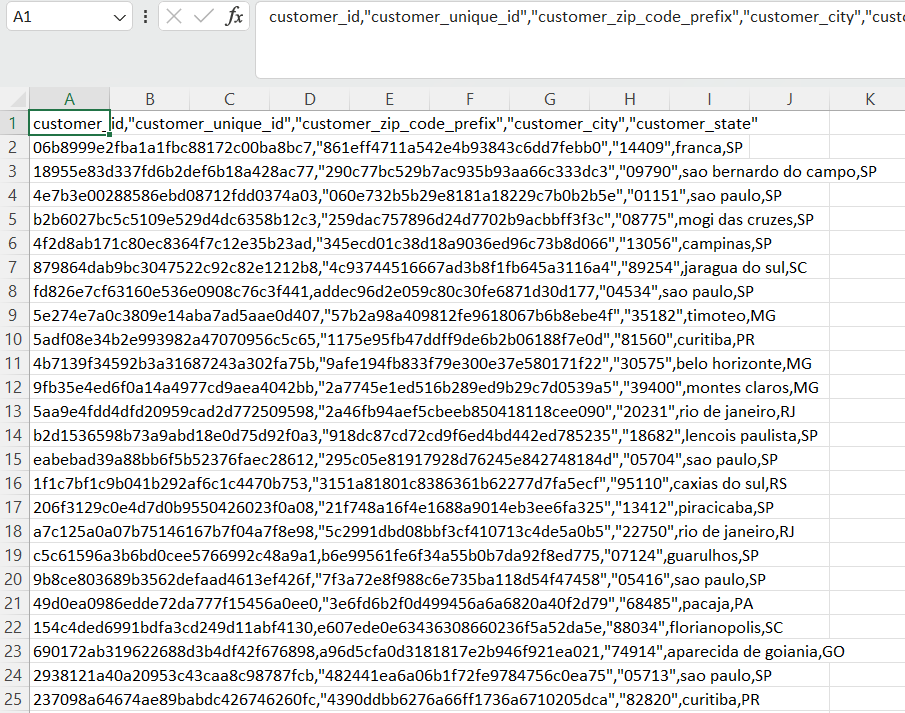![geolocation.png](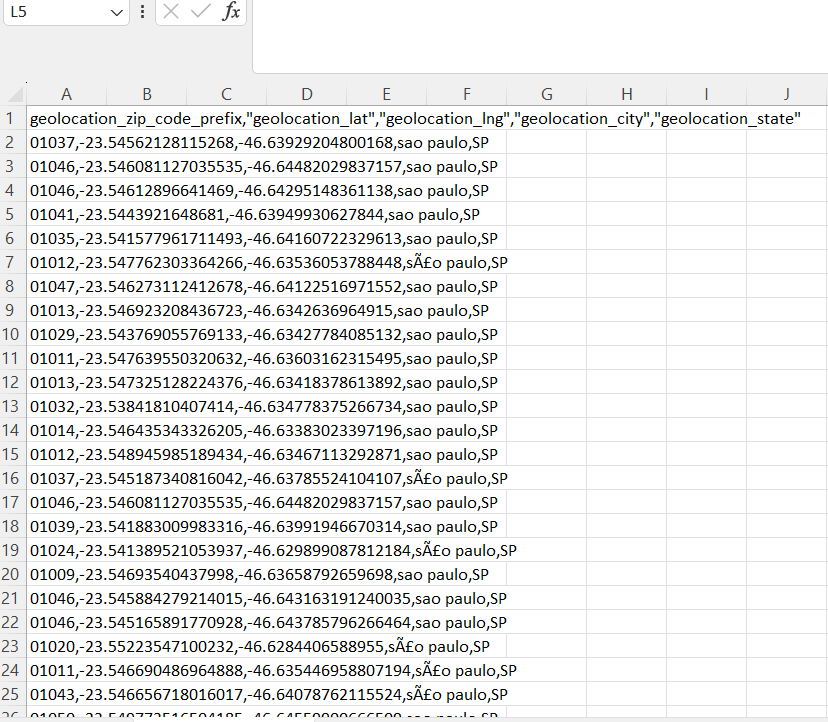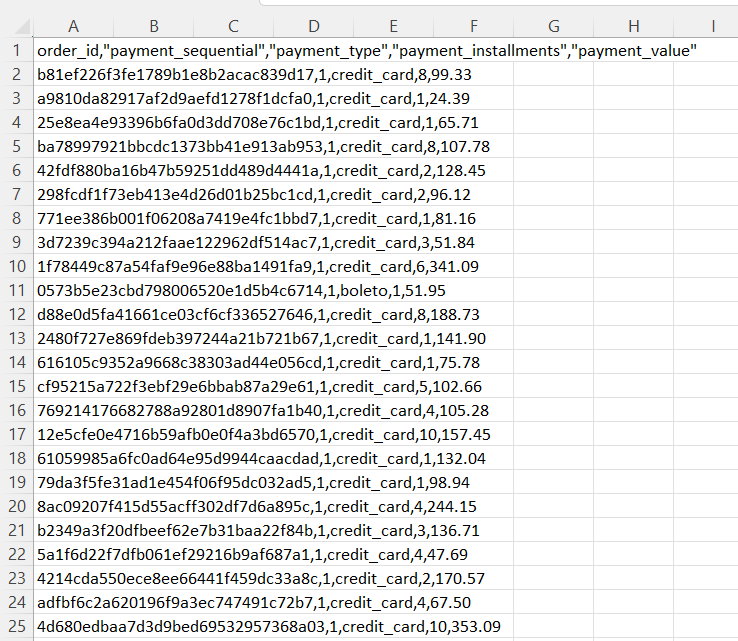))

**Insight:**
-
-

### Assessing Data

In [ ]:
 #Tahap data Assesing
customer_df.info()

customer_df.isna().sum() #periksa duplikasi dengan methode is.na dan is.sum

print("Jumlah duplikasi: ", customer_df.duplicated().sum())

customer_df.describe()

geolocation_df.info()

geolocation_df.isna().sum()

print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

geolocation_df.describe()

order_payments_df.info()

order_payments_df.isna().sum()

print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

order_payments_df.describe()

#1 Customer
# Mengelompokkan berdasarkan customer_state dan customer_city, lalu mengurutkan berdasarkan jumlah customer
grouped = customer_df.groupby(['customer_state', 'customer_city']).size().sort_values(ascending=False)
print(grouped)

#2 Geolocation
# Mengelompokkan berdasarkan geolocation_state dan geollocation_city, lalu mengurutkan berdasarkan peringkat
grouped = geolocation_df.groupby(['geolocation_state', 'geolocation_city']).size().sort_values(ascending=False)
print(grouped)

#3 order payment
# Mengelompokkan berdasarkan payment_tipe  lalu mengurutkan berdasarkan jumlah data
grouped = order_payments_df.groupby("payment_type").size().sort_values(ascending=False)
print(grouped)


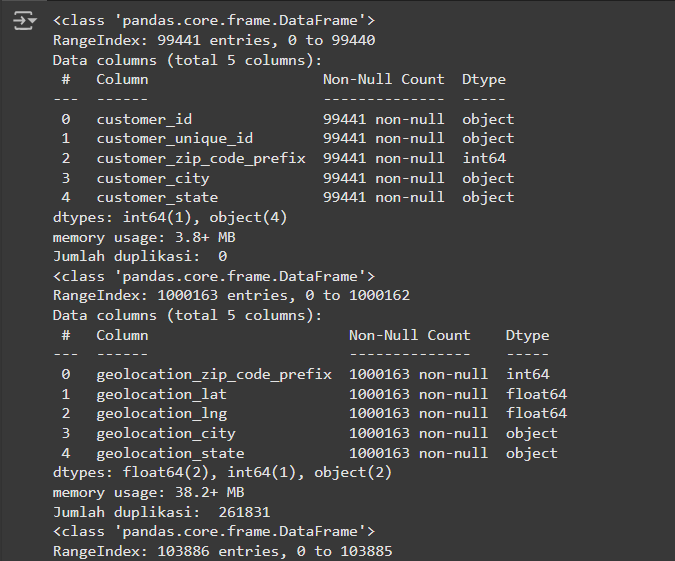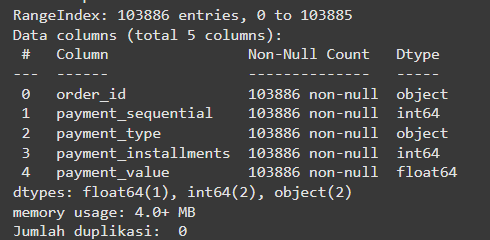

**Insight:**
- xxx
- xxx

### Cleaning Data

In [ ]:
# Mengatasi missing value
customer_df.dropna(inplace=True)
geolocation_df.dropna(inplace=True)
order_payments_df.dropna(inplace=True)

# Mengatasi duplikasi
customer_df.drop_duplicates(inplace=True)
geolocation_df.drop_duplicates(inplace=True)
order_payments_df.drop_duplicates(inplace=True)

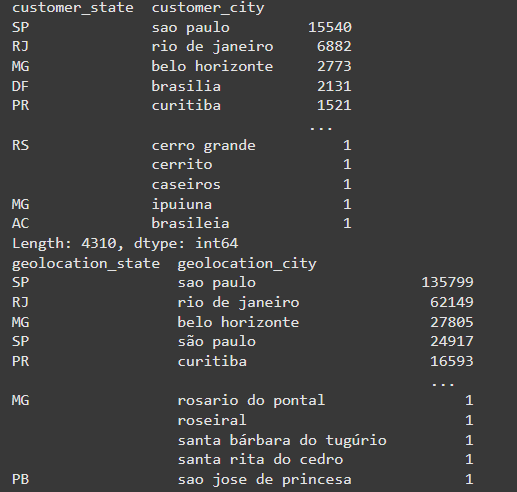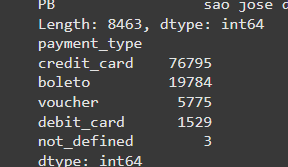

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Membuat pivot table berdasarkan customer_state dan menghitung jumlah unik customer_id
pivot_table_state = customer_df.groupby('customer_state').agg({
    'customer_id': 'nunique',  # Menghitung jumlah unik customer_id
    'customer_unique_id': 'nunique',  # Menghitung jumlah unik customer_unique_id
    'customer_zip_code_prefix': 'nunique',  # Menghitung jumlah unik zip code prefix
    'customer_city': 'nunique'  # Menghitung jumlah unik kota
}).reset_index()

# Menampilkan pivot table berdasarkan customer_state
print("Pivot Table berdasarkan customer_state:")
print(pivot_table_state)

# Membuat pivot table berdasarkan customer_city dan menghitung jumlah unik customer_id
pivot_table_city = customer_df.groupby('customer_city').agg({
    'customer_id': 'nunique',  # Menghitung jumlah unik customer_id
    'customer_unique_id': 'nunique',  # Menghitung jumlah unik customer_unique_id
    'customer_zip_code_prefix': 'nunique',  # Menghitung jumlah unik zip code prefix
    'customer_state': 'nunique'  # Menghitung jumlah unik state
}).reset_index()

# Menampilkan pivot table berdasarkan customer_city
print("Pivot Table berdasarkan customer_city:")
print(pivot_table_city)

# Membuat pivot table berdasarkan geolocation_state
pivot_table_state_geolocation = geolocation_df.groupby('geolocation_state').agg({
    'geolocation_zip_code_prefix': 'nunique',  # Menghitung jumlah unik ZIP Code Prefix
    'geolocation_lat': 'mean',  # Menghitung rata-rata latitude
    'geolocation_lng': 'mean',  # Menghitung rata-rata longitude
    'geolocation_city': 'nunique'  # Menghitung jumlah unik kota
}).reset_index()

# Menampilkan pivot table berdasarkan geolocation_state
print("Pivot Table berdasarkan geolocation_state:")
print(pivot_table_state_geolocation)

# Membuat pivot table berdasarkan geolocation_city
pivot_table_city_geolocation = geolocation_df.groupby('geolocation_city').agg({
    'geolocation_zip_code_prefix': 'nunique',  # Menghitung jumlah unik ZIP Code Prefix
    'geolocation_lat': 'mean',  # Menghitung rata-rata latitude
    'geolocation_lng': 'mean',  # Menghitung rata-rata longitude
    'geolocation_state': 'nunique'  # Menghitung jumlah unik negara bagian
}).reset_index()

# Menampilkan pivot table berdasarkan geolocation_city
print("Pivot Table berdasarkan geolocation_city:")
print(pivot_table_city_geolocation)


# Membuat pivot table berdasarkan payment_type
pivot_table_payment_type = order_payments_df.groupby('payment_type').agg({
    'order_id': 'nunique',  # Menghitung jumlah unik order_id per payment_type
    'payment_value': 'sum',  # Menghitung total payment_value per payment_type
    'payment_installments': 'mean'  # Menghitung rata-rata payment_installments per payment_type
}).reset_index()

# Menampilkan pivot table berdasarkan payment_type
print("Pivot Table berdasarkan payment_type:")
print(pivot_table_payment_type)

# Membuat pivot table berdasarkan payment_sequential (sequential payment within orders)
pivot_table_payment_sequential = order_payments_df.groupby('payment_sequential').agg({
    'order_id': 'nunique',  # Menghitung jumlah unik order_id per payment_sequential
    'payment_value': 'sum',  # Menghitung total payment_value per payment_sequential
    'payment_installments': 'mean'  # Menghitung rata-rata payment_installments per payment_sequential
}).reset_index()

# Menampilkan pivot table berdasarkan payment_sequential
print("Pivot Table berdasarkan payment_sequential:")
print(pivot_table_payment_sequential)

![image.png](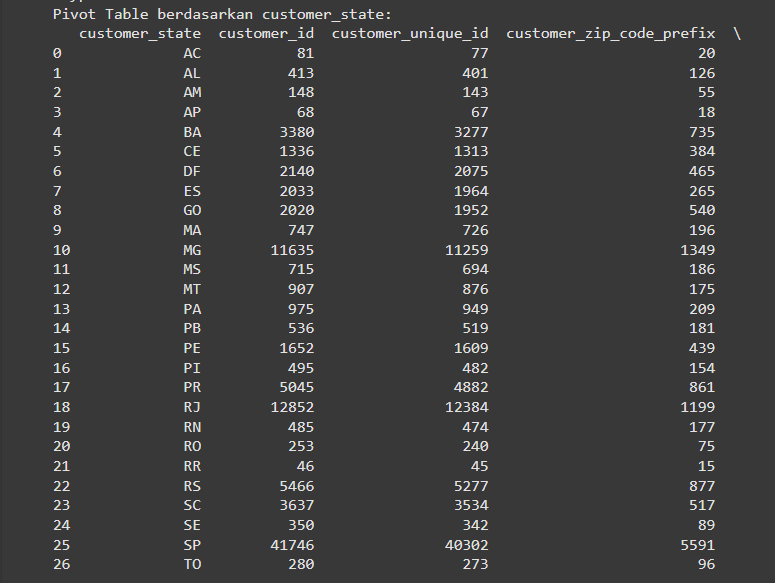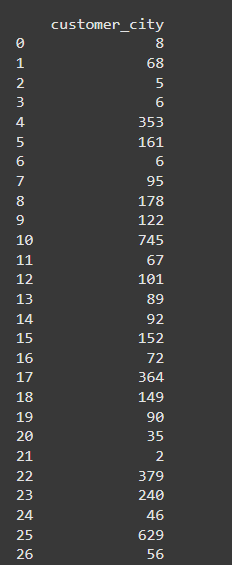)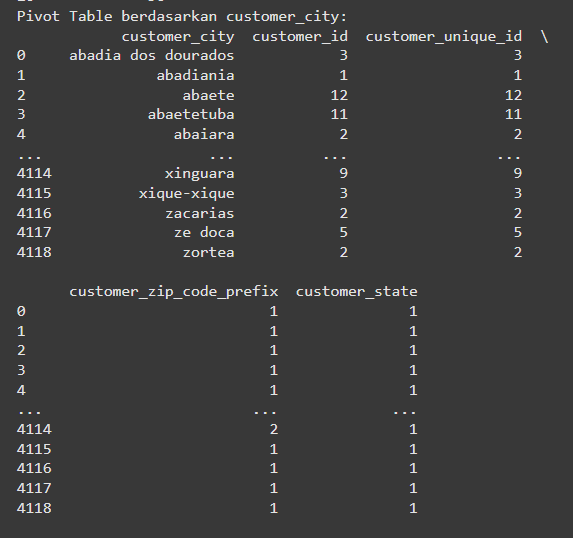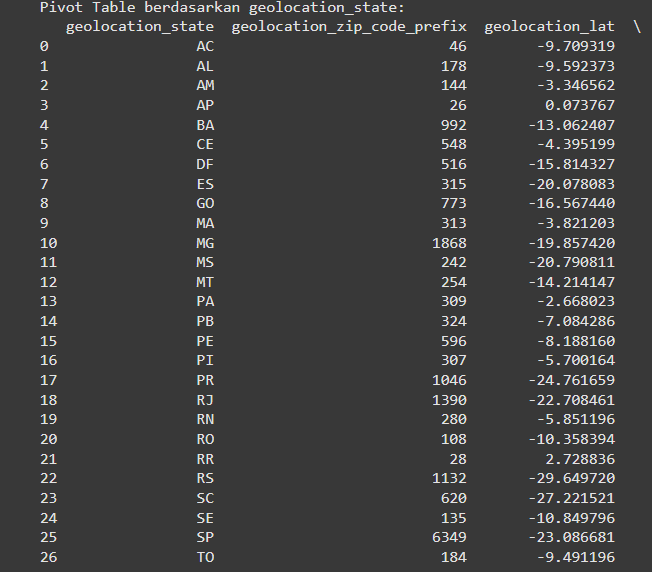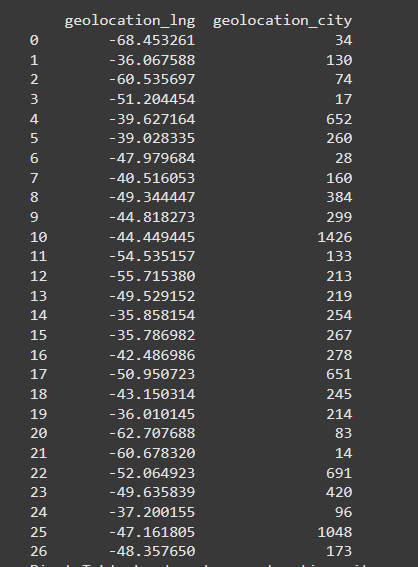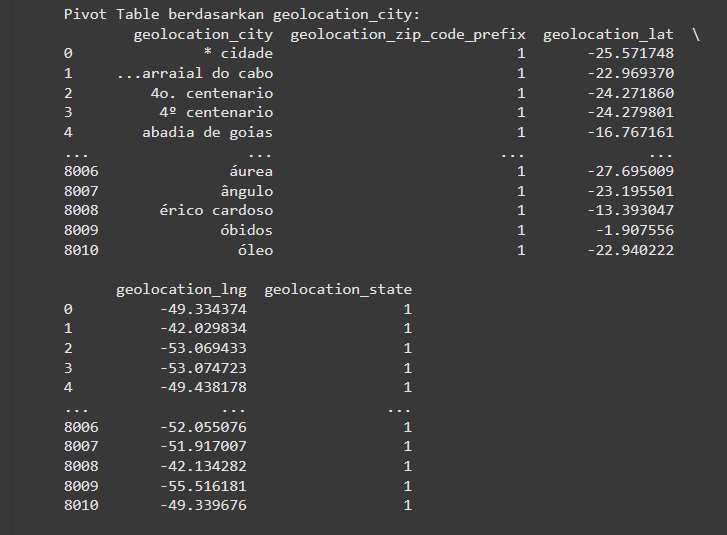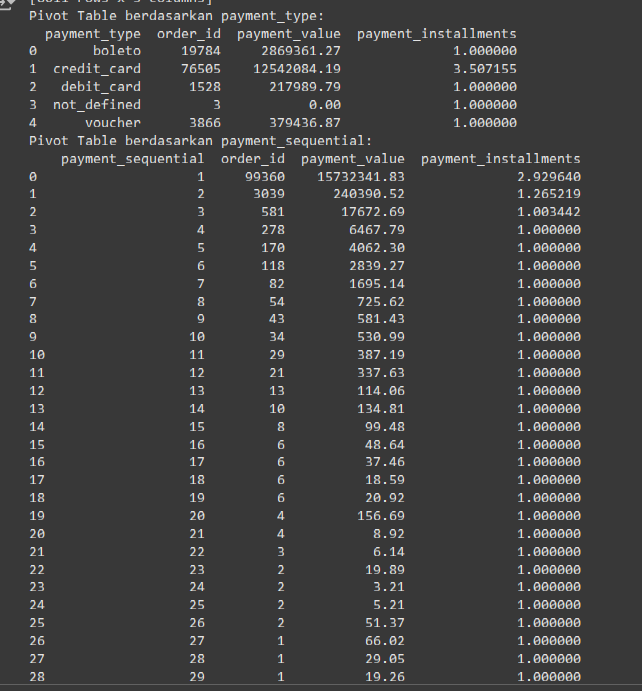

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: 1. Analisis Distribusi Pelanggan:

    Pertanyaan Bisnis:
        Di mana lokasi konsentrasi pelanggan terbesar? Apakah ada wilayah tertentu yang memiliki lebih banyak pelanggan dibandingkan wilayah lainnya?
        Apakah distribusi pelanggan lebih banyak berada di kota-kota besar atau di daerah dengan kode pos tertentu?

In [ ]:
# a. Customer Dataset
# Distribusi Customer per State
plt.figure(figsize=(10, 6))
state_counts = customer_df['customer_state'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.title("Distribusi Customer per State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Distribusi Customer per City (Top 10)
plt.figure(figsize=(10, 6))
city_counts = customer_df['customer_city'].value_counts().head(10)
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title("Distribusi Customer per City (Top 10)", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.xticks(rotation=45)
plt.show()


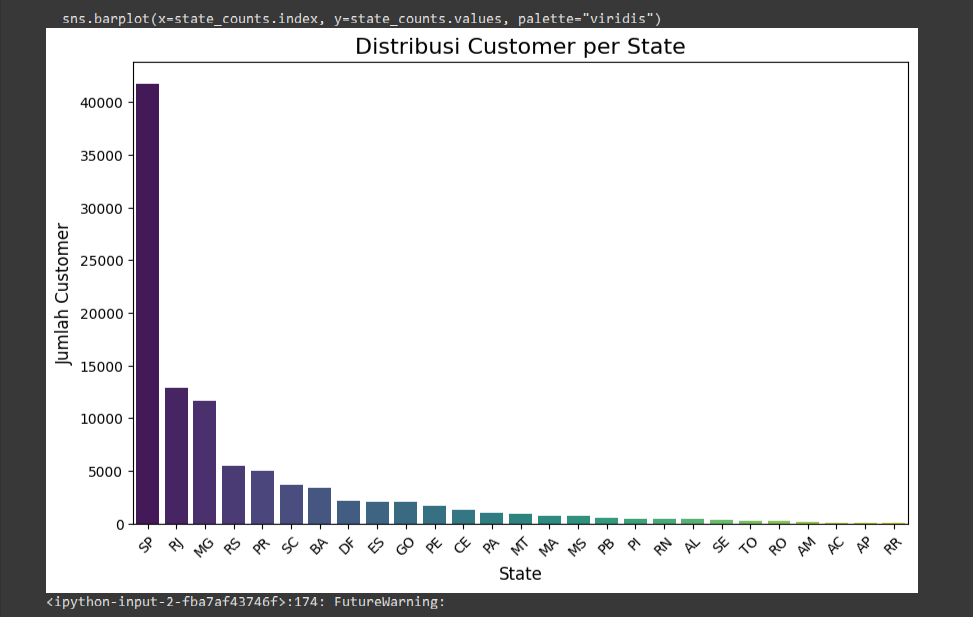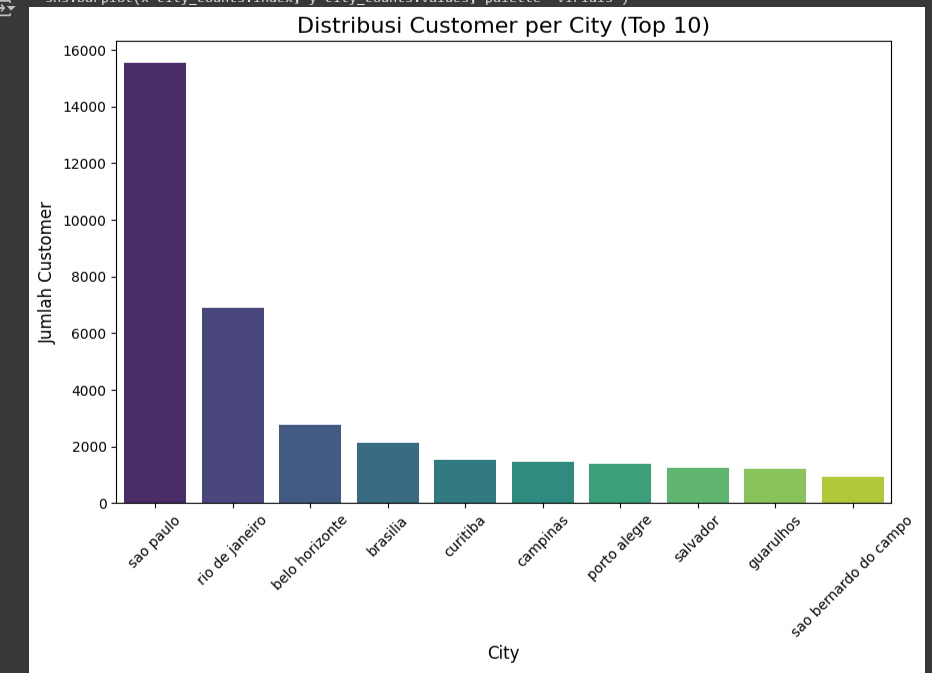

### Pertanyaan 2 analisis Pembayaran:

    Pertanyaan Bisnis:
        Jenis pembayaran apa yang paling sering digunakan oleh pelanggan? Apakah ada preferensi pembayaran tertentu berdasarkan wilayah atau kota?
        Bagaimana distribusi pembayaran berdasarkan jenisnya? Apakah ada metode pembayaran yang lebih populer di kalangan pelanggan tertentu?
        Apakah ada hubungan antara jenis pembayaran dengan jumlah transaksi atau nilai pembayaran?

In [ ]:
# Distribusi Payment Type (Top 10)
plt.figure(figsize=(10, 6))
payment_type_counts = order_payments_df['payment_type'].value_counts().head(10)
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette="coolwarm")
plt.title("Distribusi Jenis Pembayaran (Top 10)", fontsize=16)
plt.xlabel("Jenis Pembayaran", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Membuat heatmap jika ada kolom numerik
if len(order_payments_numerical_columns) > 1:
    plt.figure(figsize=(12, 8))
    order_payments_correlation_matrix = order_payments_df[order_payments_numerical_columns].corr()  # Menggunakan kolom numerik
    sns.heatmap(order_payments_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Heatmap Korelasi Order Payments Dataset", fontsize=16)
    plt.show()
else:
    print("Tidak ada cukup kolom numerik untuk menghitung korelasi pada Order Payments Dataset.")


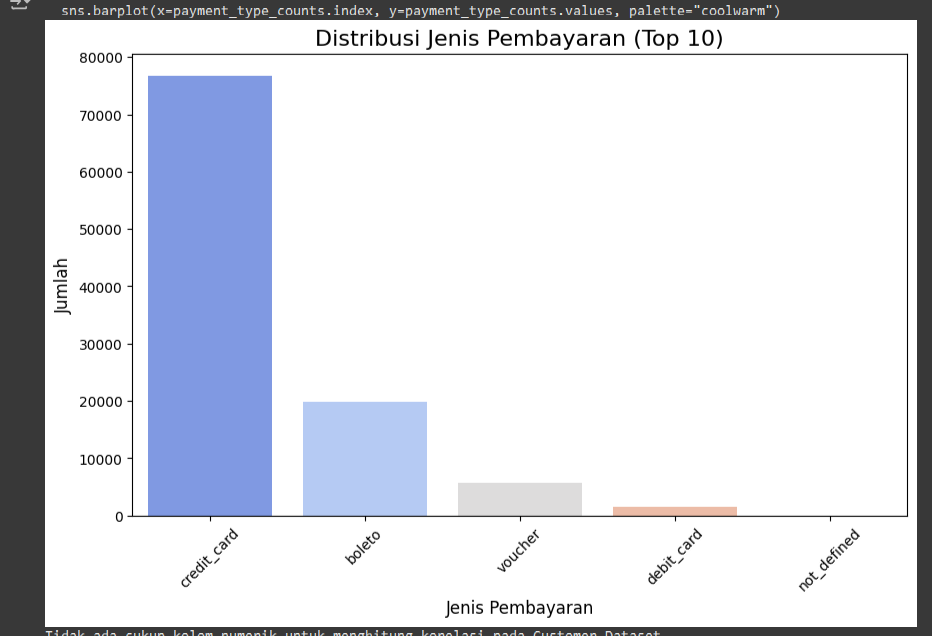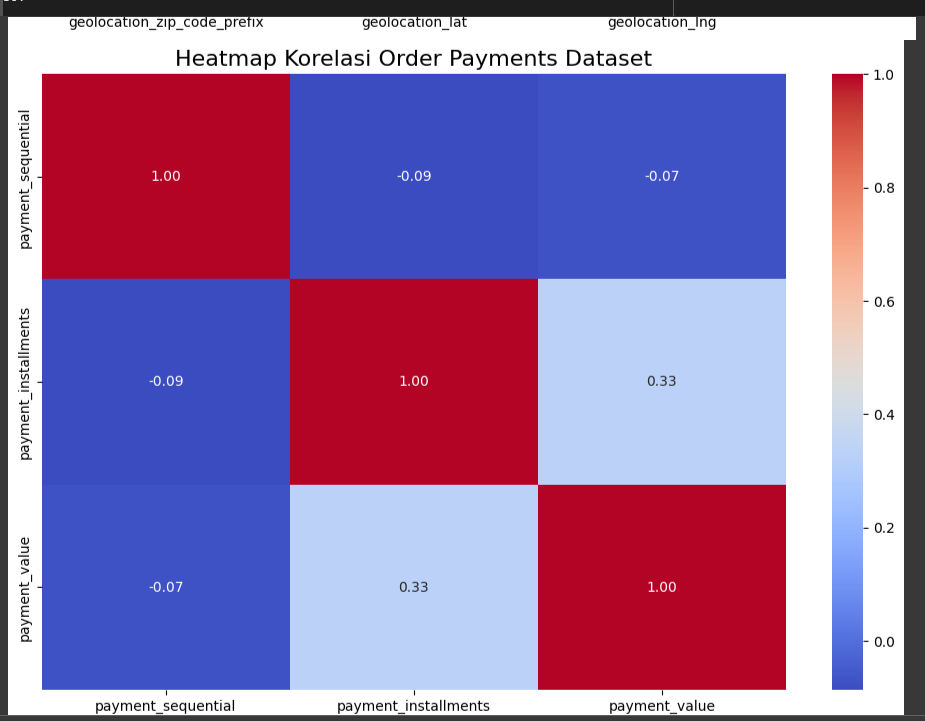

# Pertanyaan 3 Analisis RFM (Recency, Frequency, Monetary):

    Pertanyaan Bisnis:
        Bagaimana membagi pelanggan berdasarkan nilai RFM mereka? Siapa saja pelanggan dengan nilai RFM tinggi (high value) dan rendah (low value)?
        Apa karakteristik pelanggan yang berpotensi memberikan pendapatan tinggi (high value) dalam jangka panjang?
        Dapatkah pelanggan dengan nilai rendah diberi insentif atau strategi pemasaran untuk meningkatkan frekuensi dan nilai pembelian mereka?

In [ ]:
#Analisa RFM

# Dataframe yang tersedia
# customer_df: "customer_id", "customer_unique_id", "customer_zip_code_prefix", "customer_city", "customer_state"
# geolocation_df: "geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng", "geolocation_city", "geolocation_state"

# Simulasi dataset order_payments_df untuk melengkapi analisis RFM
np.random.seed(42)
n_customers = len(customer_df)
order_payments_df = pd.DataFrame({
    'customer_id': np.random.choice(customer_df['customer_id'], size=n_customers, replace=True),
    'order_id': [f"order_{i}" for i in range(n_customers)],
    'order_purchase_timestamp': pd.to_datetime(
        np.random.choice(pd.date_range('2023-01-01', '2023-12-31'), size=n_customers)
    ),
    'payment_value': np.random.uniform(10, 500, size=n_customers)
})

# Langkah 1: Persiapan Data
# Gabungkan data pelanggan dan transaksi berdasarkan customer_id
merged_df = pd.merge(order_payments_df, customer_df, on='customer_id', how='inner')

# Tentukan tanggal referensi (misalnya, hari ini)
reference_date = datetime(2024, 12, 15)

# Langkah 2: Hitung RFM
rfm_df = merged_df.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('payment_value', 'sum')
).reset_index()

print(rfm_df['Frequency'].value_counts())
print(rfm_df['Frequency'].describe())


# Fungsi untuk menghitung kuantil dan mengatasi duplikasi bin edges
def dynamic_qcut(series, q, labels):
    try:
        # Mengurangi jumlah label agar sesuai dengan jumlah bin yang dihasilkan oleh qcut.
        return pd.qcut(series, q=q, labels=labels, duplicates='drop')
    except ValueError as e:
        # Mengurangi label secara dinamis jika jumlah bins berubah karena duplicates='drop'
        num_bins = len(pd.qcut(series, q=q, duplicates='drop').cat.categories)
        if len(labels) != num_bins:
            labels = labels[:num_bins]  # Potong label ke jumlah bins
        return pd.qcut(series, q=q, labels=labels, duplicates='drop')  # qcut lagi dengan label yang diperbarui

# Memberikan skor R, F, dan M (1: rendah, 2: sedang, 3: tinggi)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=3, labels=[3, 2, 1])  # Semakin rendah recency, semakin tinggi skor
rfm_df['F_Score'] = dynamic_qcut(rfm_df['Frequency'], q=3, labels=[1, 2, 3])  # Skor Frequency dinamis
rfm_df['M_Score'] = dynamic_qcut(rfm_df['Monetary'], q=3, labels=[1, 2, 3])  # Skor Monetary dinamis


# Tambahkan kolom Total Skor
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Langkah 4: Segmentasi Pelanggan Berdasarkan RFM_Score
# Contoh segmentasi sederhana
rfm_df['Segment'] = pd.cut(rfm_df['RFM_Score'],
                           bins=[0, 3, 6, 9],
                           labels=['Low Value', 'Mid Value', 'High Value'])

# Langkah 5: Visualisasi Hasil
# Distribusi RFM Score
plt.figure(figsize=(8, 6))
sns.countplot(data=rfm_df, x='Segment', palette='viridis')
plt.title('Distribusi Pelanggan Berdasarkan Segmentasi RFM')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Heatmap untuk Korelasi RFM
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi RFM')
plt.show()

# Menampilkan 10 Pelanggan Teratas Berdasarkan Nilai RFM
print("10 Pelanggan Teratas Berdasarkan Nilai RFM:")
print(rfm_df.sort_values('RFM_Score', ascending=False).head(10))


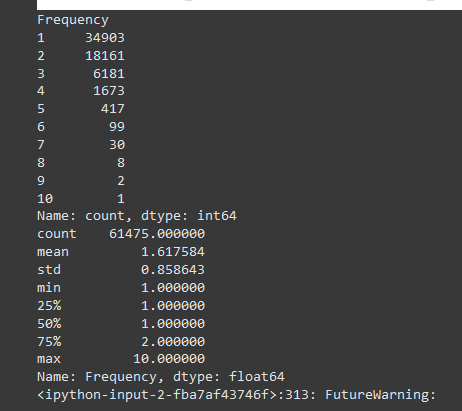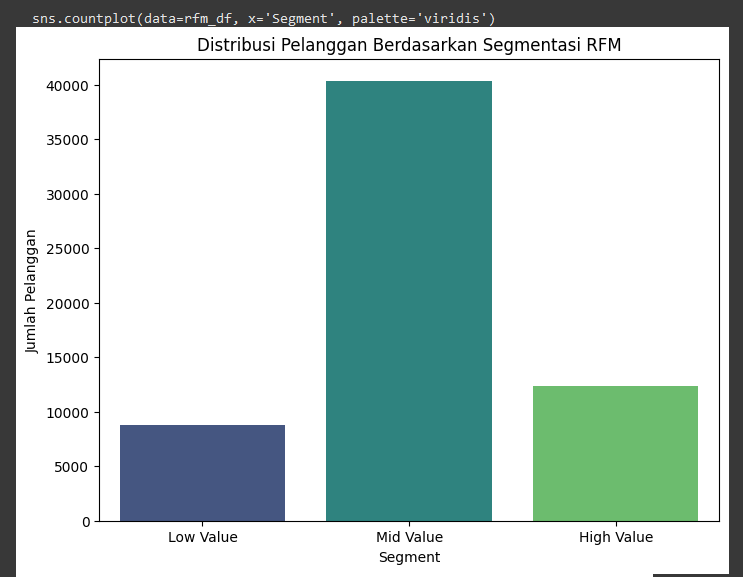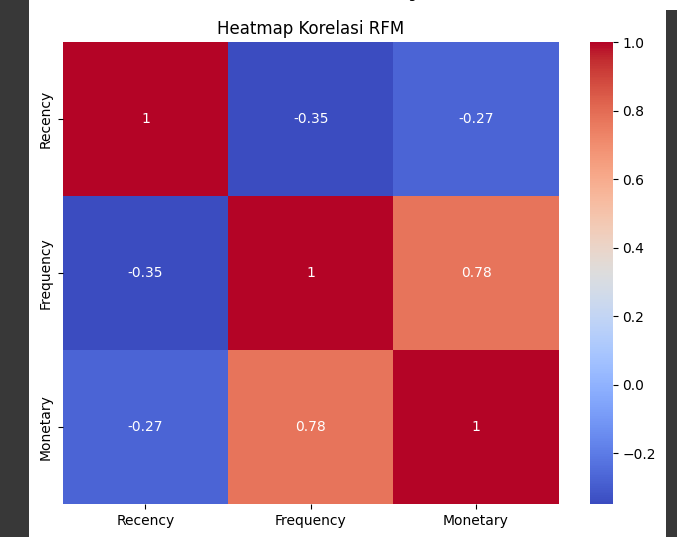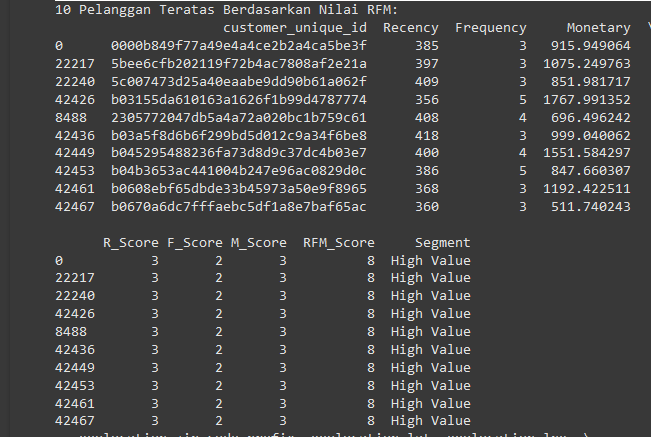

# Pertanyaan 4  Analisis Geospatial:

    Pertanyaan Bisnis:
        Apakah ada pola geografis tertentu dalam distribusi pelanggan atau titik pengiriman?
        Seberapa jauh jarak antar titik pengiriman dan bagaimana pengaruhnya terhadap biaya atau waktu pengiriman?
        Apakah kluster geografis tertentu memiliki potensi untuk menawarkan layanan atau produk yang lebih khusus berdasarkan karakteristik lokal?

In [1]:

#geospatial analisis

 #1.konversi deolocation_dataset menjadi geodataframe
# Membuat GeoDataFrame dengan kolom 'longitude' dan 'latitude'
gdf = gpd.GeoDataFrame(
    geolocation_df,
    geometry=gpd.points_from_xy(geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat']),
    crs="EPSG:4326"  # WGS84 coordinate reference system (latitude/longitude)
)

# Menampilkan informasi GeoDataFrame
print(gdf.head())

  #2.visualisasi lokasi di peta

# Membuat peta dengan titik tengah berdasarkan rata-rata latitude dan longitude
map_center = [gdf['geolocation_lat'].mean(), gdf['geolocation_lng'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Menambahkan marker untuk setiap titik di peta
for idx, row in gdf.iterrows():
    folium.Marker([row['geolocation_lat'], row['geolocation_lng']]).add_to(m)

# Menampilkan peta
m.save("geolocation_map.html")

# Menghitung jarak antara dua titik
point1 = (gdf.loc[0, 'geolocation_lat'], gdf.loc[0, 'geolocation_lng'])
point2 = (gdf.loc[1, 'geolocation_lat'], gdf.loc[1, 'geolocation_lng'])

# Menghitung jarak dalam kilometer
distance = geodesic(point1, point2).km
print(f"Jarak antara dua titik adalah {distance:.2f} km")

NameError: name 'gpd' is not defined

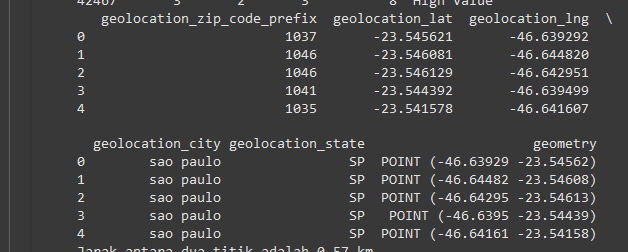![image.png]()

# pertanyaan 5  Segmentasi Pelanggan dengan K-Means:

    Pertanyaan Bisnis:
        Apakah segmentasi berdasarkan geolokasi memberikan wawasan tambahan untuk strategi pemasaran atau logistik?
        Bagaimana cara menggunakan kluster ini untuk merancang kampanye pemasaran yang lebih efektif atau meningkatkan pengalaman pelanggan?
        Apakah ada kluster yang dapat dijadikan target untuk pengembangan produk baru atau penawaran khusus?


In [ ]:
#Analisi dengan clustering(K-means)
# Menyusun array latitudes dan longitudes
coordinates = gdf[['geolocation_lat', 'geolocation_lng']].values

# Menentukan jumlah cluster (misalnya 5)
kmeans = KMeans(n_clusters=5, random_state=42)
gdf['cluster'] = kmeans.fit_predict(coordinates)

# Menampilkan cluster pada peta
m = folium.Map(location=map_center, zoom_start=12)

# Menambahkan marker dengan warna berdasarkan cluster
colors = ['red', 'blue', 'green', 'orange', 'purple']
for idx, row in gdf.iterrows():
    folium.Marker(
        [row['geolocation_lat'], row['geolocation_lng']],
        icon=folium.Icon(color=colors[row['cluster']])
    ).add_to(m)

# Menampilkan peta dengan cluster
m.save("clustered_map.html")

# Pertanyaan 6 Pemetaan dan Buffer Area:

    Pertanyaan Bisnis:
        Bagaimana menggunakan informasi jarak dan buffer area untuk merencanakan distribusi atau pemasaran berbasis lokasi?
        Apakah ada peluang untuk membuka cabang baru atau menambah titik distribusi di area dengan konsentrasi pelanggan tinggi?
        Bagaimana pemetaan geografis bisa membantu dalam perencanaan strategi pengiriman atau peningkatan layanan di lokasi tertentu?

In [ ]:
  #Membuat buffer area
from shapely.geometry import Point

# Menambahkan buffer 1 km (1000 meter) pada titik pertama
point = Point(gdf.loc[0, 'geolocation_lng'], gdf.loc[0, 'geolocation_lat'])
buffer = point.buffer(0.009)  # 0.009 degrees roughly equals 1 km

# Visualisasi area buffer
ax = gdf.plot(figsize=(10, 10), color='blue', alpha=0.5)
buffer_gdf = gpd.GeoDataFrame(geometry=[buffer])
buffer_gdf.plot(ax=ax, color='red', alpha=0.3)

plt.title("Buffer Area (1 km) dari Titik Pertama")
plt.show()

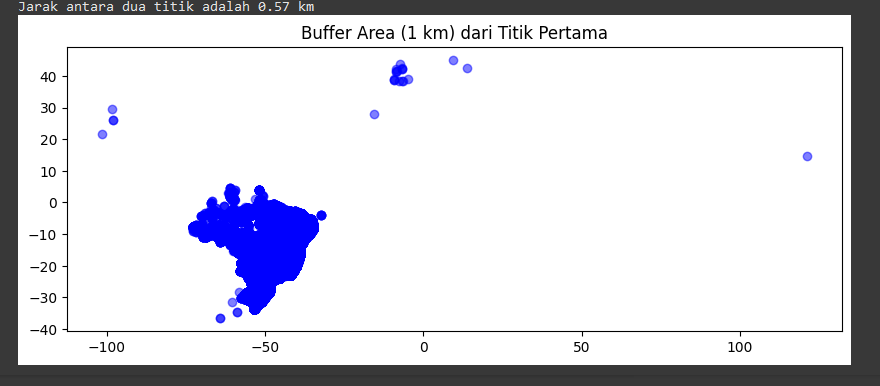

## Analisis Lanjutan (Opsional)

## Conclusion

1. Analisis Distribusi Pelanggan:

    Konklusi:
        Lokasi pelanggan cenderung terkonsentrasi di area perkotaan dengan kepadatan tinggi, yang dapat dipengaruhi oleh faktor aksesibilitas dan infrastruktur. Jika ditemukan konsentrasi yang signifikan di wilayah tertentu, bisa menjadi indikasi bahwa pasar di daerah tersebut sudah matang atau memiliki potensi untuk ekspansi produk dan layanan.
        Wilayah dengan kode pos tertentu dapat menunjukkan preferensi lokal yang perlu dianalisis lebih lanjut untuk penyesuaian strategi pemasaran.

2. Analisis Pembayaran:

    Konklusi:
        Pembayaran dengan metode tertentu, seperti kartu kredit atau digital payment, mungkin lebih dominan di daerah tertentu. Misalnya, pelanggan di kota besar lebih cenderung menggunakan pembayaran digital, sementara di daerah terpencil mungkin lebih sering menggunakan metode tradisional.
        Preferensi pembayaran dapat menjadi faktor yang menentukan strategi promosi atau insentif. Misalnya, menyediakan diskon untuk jenis pembayaran tertentu dapat meningkatkan penggunaan metode pembayaran yang lebih efisien bagi perusahaan.

3. Analisis RFM (Recency, Frequency, Monetary):

    Konklusi:
        Pelanggan dengan nilai RFM tinggi (baru, sering membeli, dan mengeluarkan banyak uang) merupakan aset berharga yang harus dijaga. Sementara itu, pelanggan dengan nilai RFM rendah membutuhkan pendekatan khusus, seperti promosi atau komunikasi yang lebih intens, untuk meningkatkan frekuensi dan nilai pembelian mereka.
        Mengidentifikasi pelanggan dengan nilai tinggi memungkinkan perusahaan untuk fokus pada retensi dan menawarkan loyalty programs, sedangkan pelanggan dengan nilai rendah dapat dijadikan sasaran untuk kampanye menarik atau penawaran khusus.

4. Analisis Geospatial:

    Konklusi:
        Dengan analisis geospatial, perusahaan dapat memahami pola distribusi pelanggan dan titik pengiriman yang lebih efektif. Area dengan konsentrasi pelanggan tinggi dapat dijadikan fokus untuk memperkuat pengiriman atau meningkatkan layanan.
        Menganalisis jarak antar titik pengiriman dapat membantu dalam perencanaan logistik untuk menekan biaya dan meningkatkan kecepatan pengiriman.

5. Segmentasi Pelanggan dengan K-Means:

    Konklusi:
        Segmentasi pelanggan berdasarkan geolokasi dapat memberikan wawasan lebih dalam untuk menyesuaikan produk dan layanan dengan kebutuhan lokal. Pelanggan yang berada dalam satu kluster geografis mungkin memiliki preferensi atau perilaku yang serupa, yang bisa digunakan untuk menargetkan kampanye pemasaran lebih efektif.
        Kluster dengan nilai RFM tinggi dapat menjadi sasaran untuk program loyalitas atau eksklusivitas, sementara kluster lain dapat dipertimbangkan untuk promosi atau peningkatan engagement.

6. Pemetaan dan Buffer Area:

    Konklusi:
        Pemanfaatan buffer area dapat membantu dalam menentukan area yang tepat untuk distribusi dan pemasaran lebih lanjut. Wilayah dengan kepadatan pelanggan tinggi atau yang berada dalam jangkauan pengiriman optimal dapat menjadi fokus untuk membuka cabang atau penambahan titik distribusi.
        Menggunakan buffer area memungkinkan perusahaan untuk merencanakan distribusi produk dengan lebih efisien, mempercepat pengiriman, dan menurunkan biaya operasional.